In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [17]:
loan_train=pd.read_csv('C:/Users/user/Desktop/pythonfiles/loan_train.csv')
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
loan_train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:


cat_features=[features for features in loan_train.columns if loan_train[features].dtype=='O']
cat_features

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [20]:
cate_features=[features for features in cat_features if features!='Loan_ID' and features!='Loan_Status']
cate_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [21]:
for features in cate_features:
    data=loan_train.copy()
    print(features,' ',(data[features].isnull().sum()/len(data[features])*100))
    

Gender   2.1172638436482085
Married   0.4885993485342019
Dependents   2.44299674267101
Education   0.0
Self_Employed   5.211726384364821
Property_Area   0.0


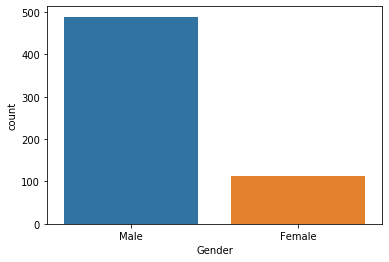

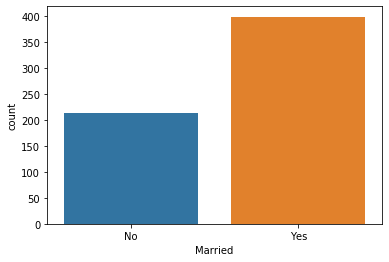

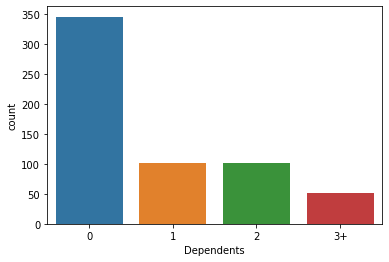

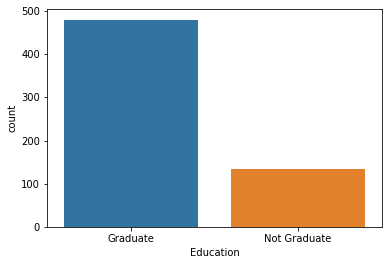

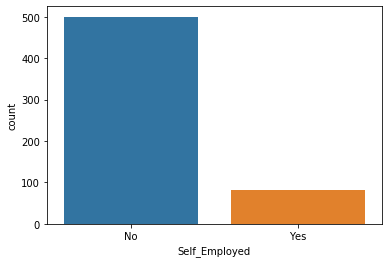

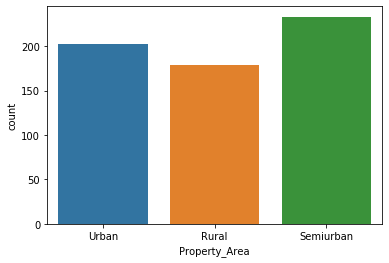

In [22]:
# bar plot for each categorical features

for features in cate_features:
    data=loan_train.copy()
    sns.countplot(data[features])
    plt.show()
    

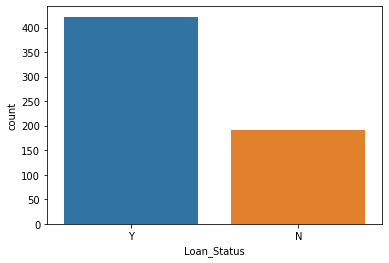

In [27]:
sns.countplot(loan_train['Loan_Status'])

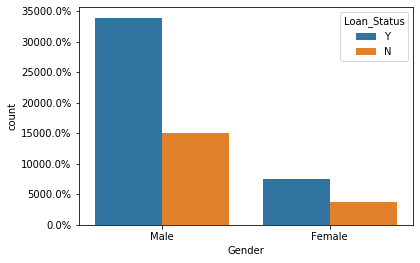

In [23]:
sns.countplot(x='Gender',hue='Loan_Status' ,data=loan_train)
from matplotlib.ticker import FuncFormatter
def to_percent(y, position):
    s = str(100*y)
    return s + '%'
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

# semiurban propert_area has better chance of getting loan sanctioned 

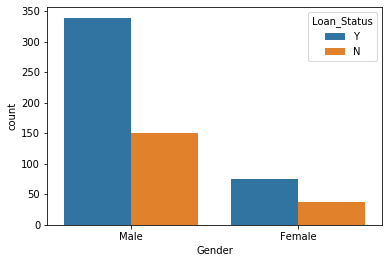

In [24]:
sns.countplot(x='Gender',hue='Loan_Status' ,data=loan_train)

# male has better chances of getting loan

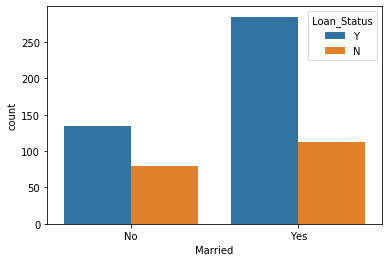

In [25]:
sns.countplot(x='Married',hue='Loan_Status' ,data=loan_train)

# % of people who are married has indeed good chance of getting loan




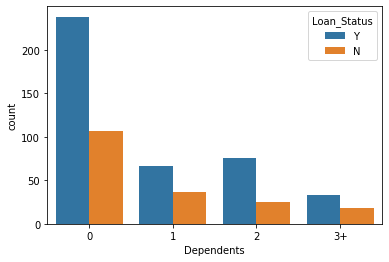

In [26]:
sns.countplot(x='Dependents',hue='Loan_Status' ,data=loan_train)

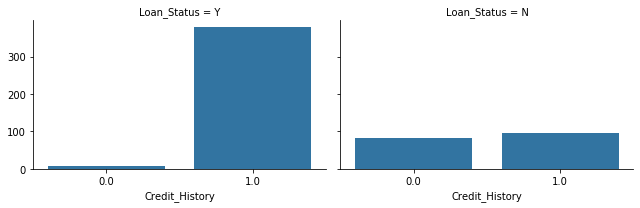

In [27]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Credit_History')

# people with credit_history 0 did not get any loan
# people with credit history=1 had better chances of getting the loan

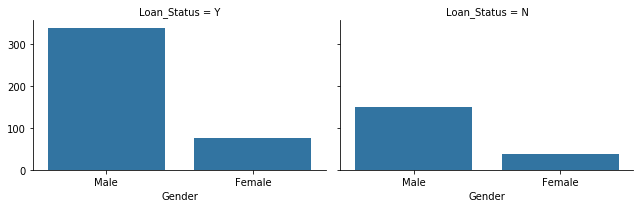

In [28]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Gender')


# if gender is =male, the chances of getting laon is better
# for females , we cannot get a good idea in this case

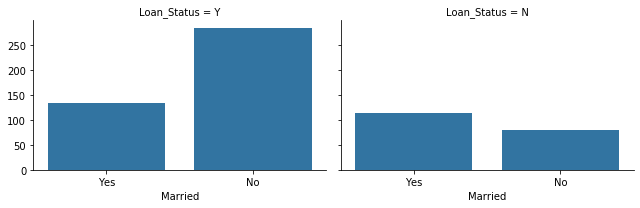

In [29]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Married')

# most people who are not married did get a loan
# people who are married did not show any particular pattern

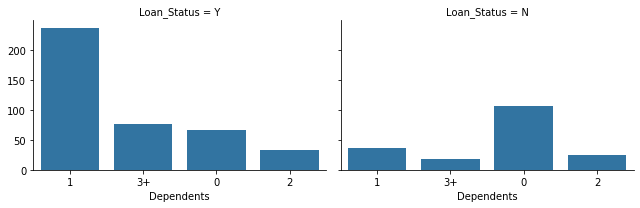

In [30]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Dependents')

# most people with dependents =1 & 3+ got the loan


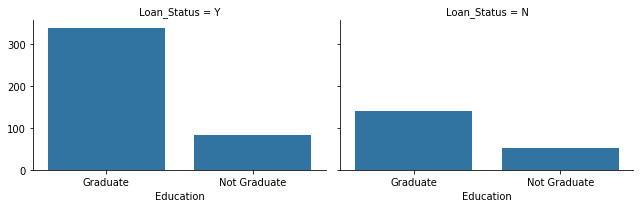

In [31]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Education')


# most people who are graduate got the loan
# for non-graduates , there is not musch difference in the no. of people getting loan and no.of people not getting loan

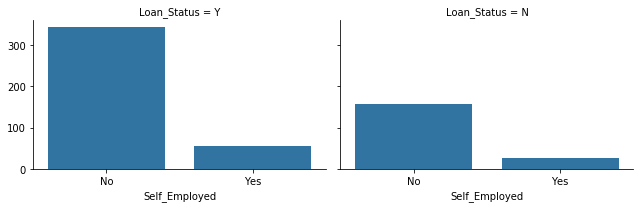

In [32]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Self_Employed')

# most people who are not self-employed got loan
#for self-employed , there is not much difference in the no. of people getting loan and no.of people not getting loan


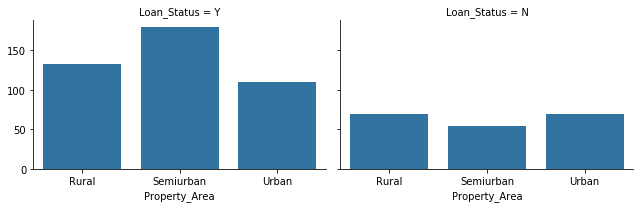

In [33]:
grid=sns.FacetGrid(loan_train,col='Loan_Status', size=3,aspect=1.5)
grid.map(sns.countplot,'Property_Area')

# most people wanting loan for semi-urban property area get the loan
# for rural and urban properties , we cannot conclude much